# Amazon Sales Analysis

**Problem Statement:**

Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

* Find key metrics and factors and show the meaningful relationships between attributes.
* Do your own research and come up with your findings

<hr style="border:2px solid gray"> </hr>

# • Import Library for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

<hr style="border:2px solid gray"> </hr>


# • Import Data Set

In [2]:
git = pd.read_html('https://github.com/Vishwjeet-Feb/Amazon-Sales-Analysis/blob/main/amazonsales.csv')

In [3]:
df = pd.DataFrame(git[0])
df.drop(columns='Unnamed: 0',inplace=True)

<hr style="border:2px solid gray"> </hr>


# • First Glims of Data Set

In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


<hr style="border:2px solid gray"> </hr>

# Shape of Data Set

In [5]:
df.shape

(100, 14)

<hr style="border:2px solid gray"> </hr>

# All Columns Name of Data set

In [6]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

<hr style="border:2px solid gray"> </hr>

# • Data Types of Attributes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


* Convert order date and ship date from object data type to data time data type
* Convert Order ID int64 to object

<hr style="border:2px solid gray"> </hr>

# • Convert Data Type

In [8]:
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')
df['Order ID'] = df['Order ID'].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    object        
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memor

<hr style="border:2px solid gray"> </hr>

# Null Values Available into the Data Set

In [10]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [11]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

* There is no Null value are present into the data set

<hr style="border:2px solid gray"> </hr>

# • Numerical Column Statistical Discription

In [12]:
df.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


#### Numeric Data Frame

In [13]:
num = df[df.dtypes[df.dtypes != 'object'].index].drop(columns=['Order Date','Ship Date'])
num

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,2804,205.70,117.11,576782.80,328376.44,248406.36
2,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,8102,9.33,6.92,75591.66,56065.84,19525.82
4,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...
95,888,109.28,35.84,97040.64,31825.92,65214.72
96,6267,9.33,6.92,58471.11,43367.64,15103.47
97,1485,154.06,90.93,228779.10,135031.05,93748.05
98,5767,81.73,56.67,471336.91,326815.89,144521.02


In [14]:
# Total Profit Done by the company
print(""" 
Findings From The Numerical Columns
""")
print(f"• Total Revenue of the company is {df['Total Revenue'].sum()}")
print(f"• Total Cost Requierd involve company is {df['Total Cost'].sum()}")
print(f"• Total Profit done by the company is {df['Total Profit'].sum()}")
print(f"• Costliest Item is Company {df[df['Unit Price'] == 668.27]['Item Type'].unique()} and its price is {num['Unit Price'].max()}")
print(f"• Max Unit {num['Units Sold'].max()}Sod in Amazon is {df[df['Units Sold'] == 9925]['Item Type'].unique()}")

 
Findings From The Numerical Columns

• Total Revenue of the company is 137348768.31
• Total Cost Requierd involve company is 93180569.91000001
• Total Profit done by the company is 44168198.39999999
• Costliest Item is Company ['Household'] and its price is 668.27
• Max Unit 9925Sod in Amazon is ['Baby Food']


<hr style="border:2px solid gray"> </hr>

# Categorical Column Statistical Description

In [15]:
df[df.dtypes[df.dtypes == 'object'].index].describe()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID
count,100,100,100,100,100,100
unique,7,76,12,2,4,100
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,669165933
freq,36,4,13,50,30,1


* There are 7 region , 76 countries, 12 items available in the data set.
* Max sales according to region Sub-Saharan Africa frequency 36.
* Max sales according to country The Gambia frequency 4.
* Best sales intem in amazon is Clothes and frequency is 13.
* 50 % of items buy from offline sales channel.

<hr style="border:2px solid gray"> </hr>

# Correlation Between the Attributes

In [16]:
df.corr()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


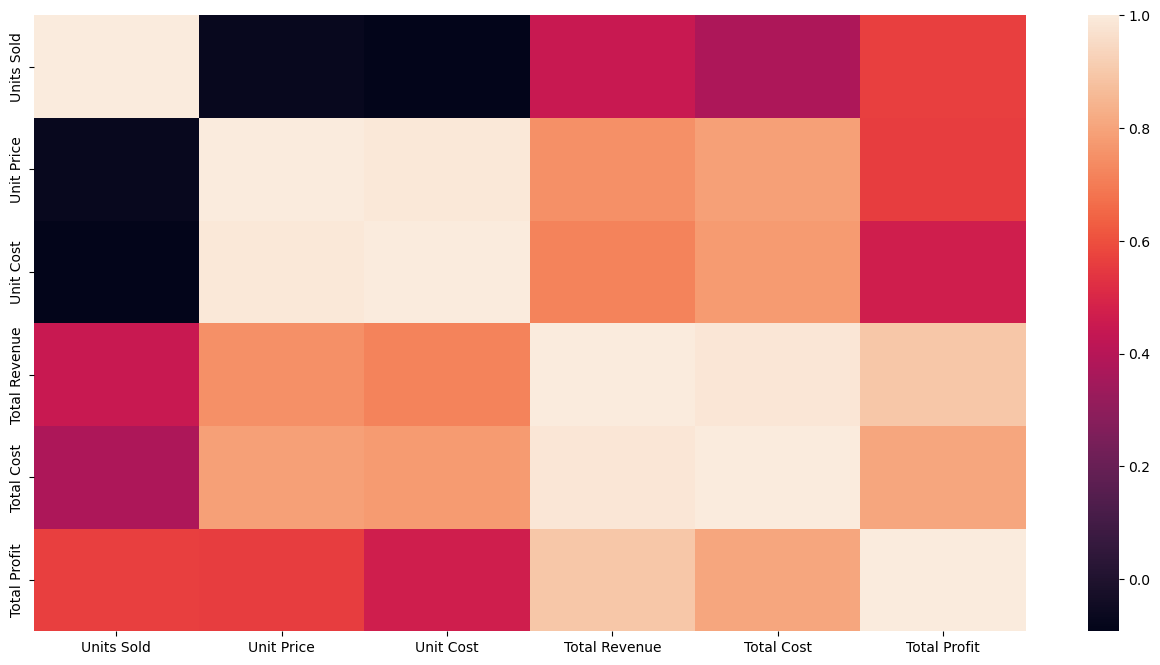

In [17]:
plt.figure(figsize=[16,8])
sns.heatmap(df.corr())
plt.show()

<hr style="border:2px solid gray"> </hr>

# • Sales Channel distribution

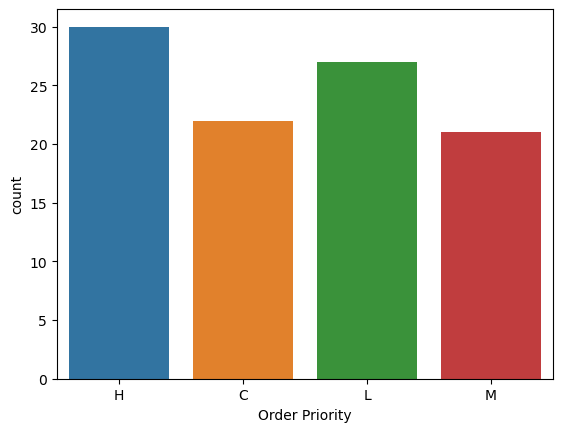

In [18]:
sns.countplot(data = df, x = 'Order Priority')
plt.show()

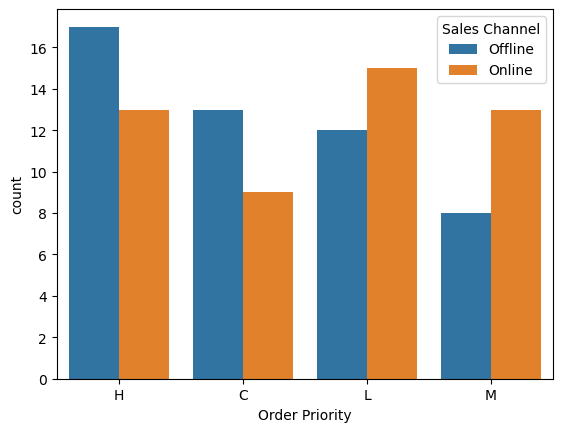

In [19]:
sns.countplot(data = df, x = 'Order Priority', hue = 'Sales Channel')
plt.show()

<hr style="border:2px solid gray"> </hr>

# • Maximum Profit According To Region

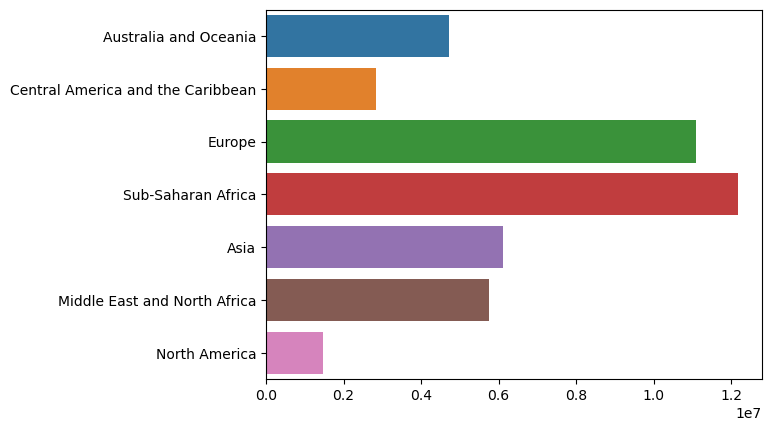

In [20]:
r = df['Region'].unique()
l1 = []
for i in df['Region'].unique():
    a = df[df['Region']==i]['Total Profit'].sum()
    l1.append(a)
sns.barplot(y=r,x=l1)
plt.show()

<hr style="border:2px solid gray"> </hr>

# • Maximum Profite according to Countries

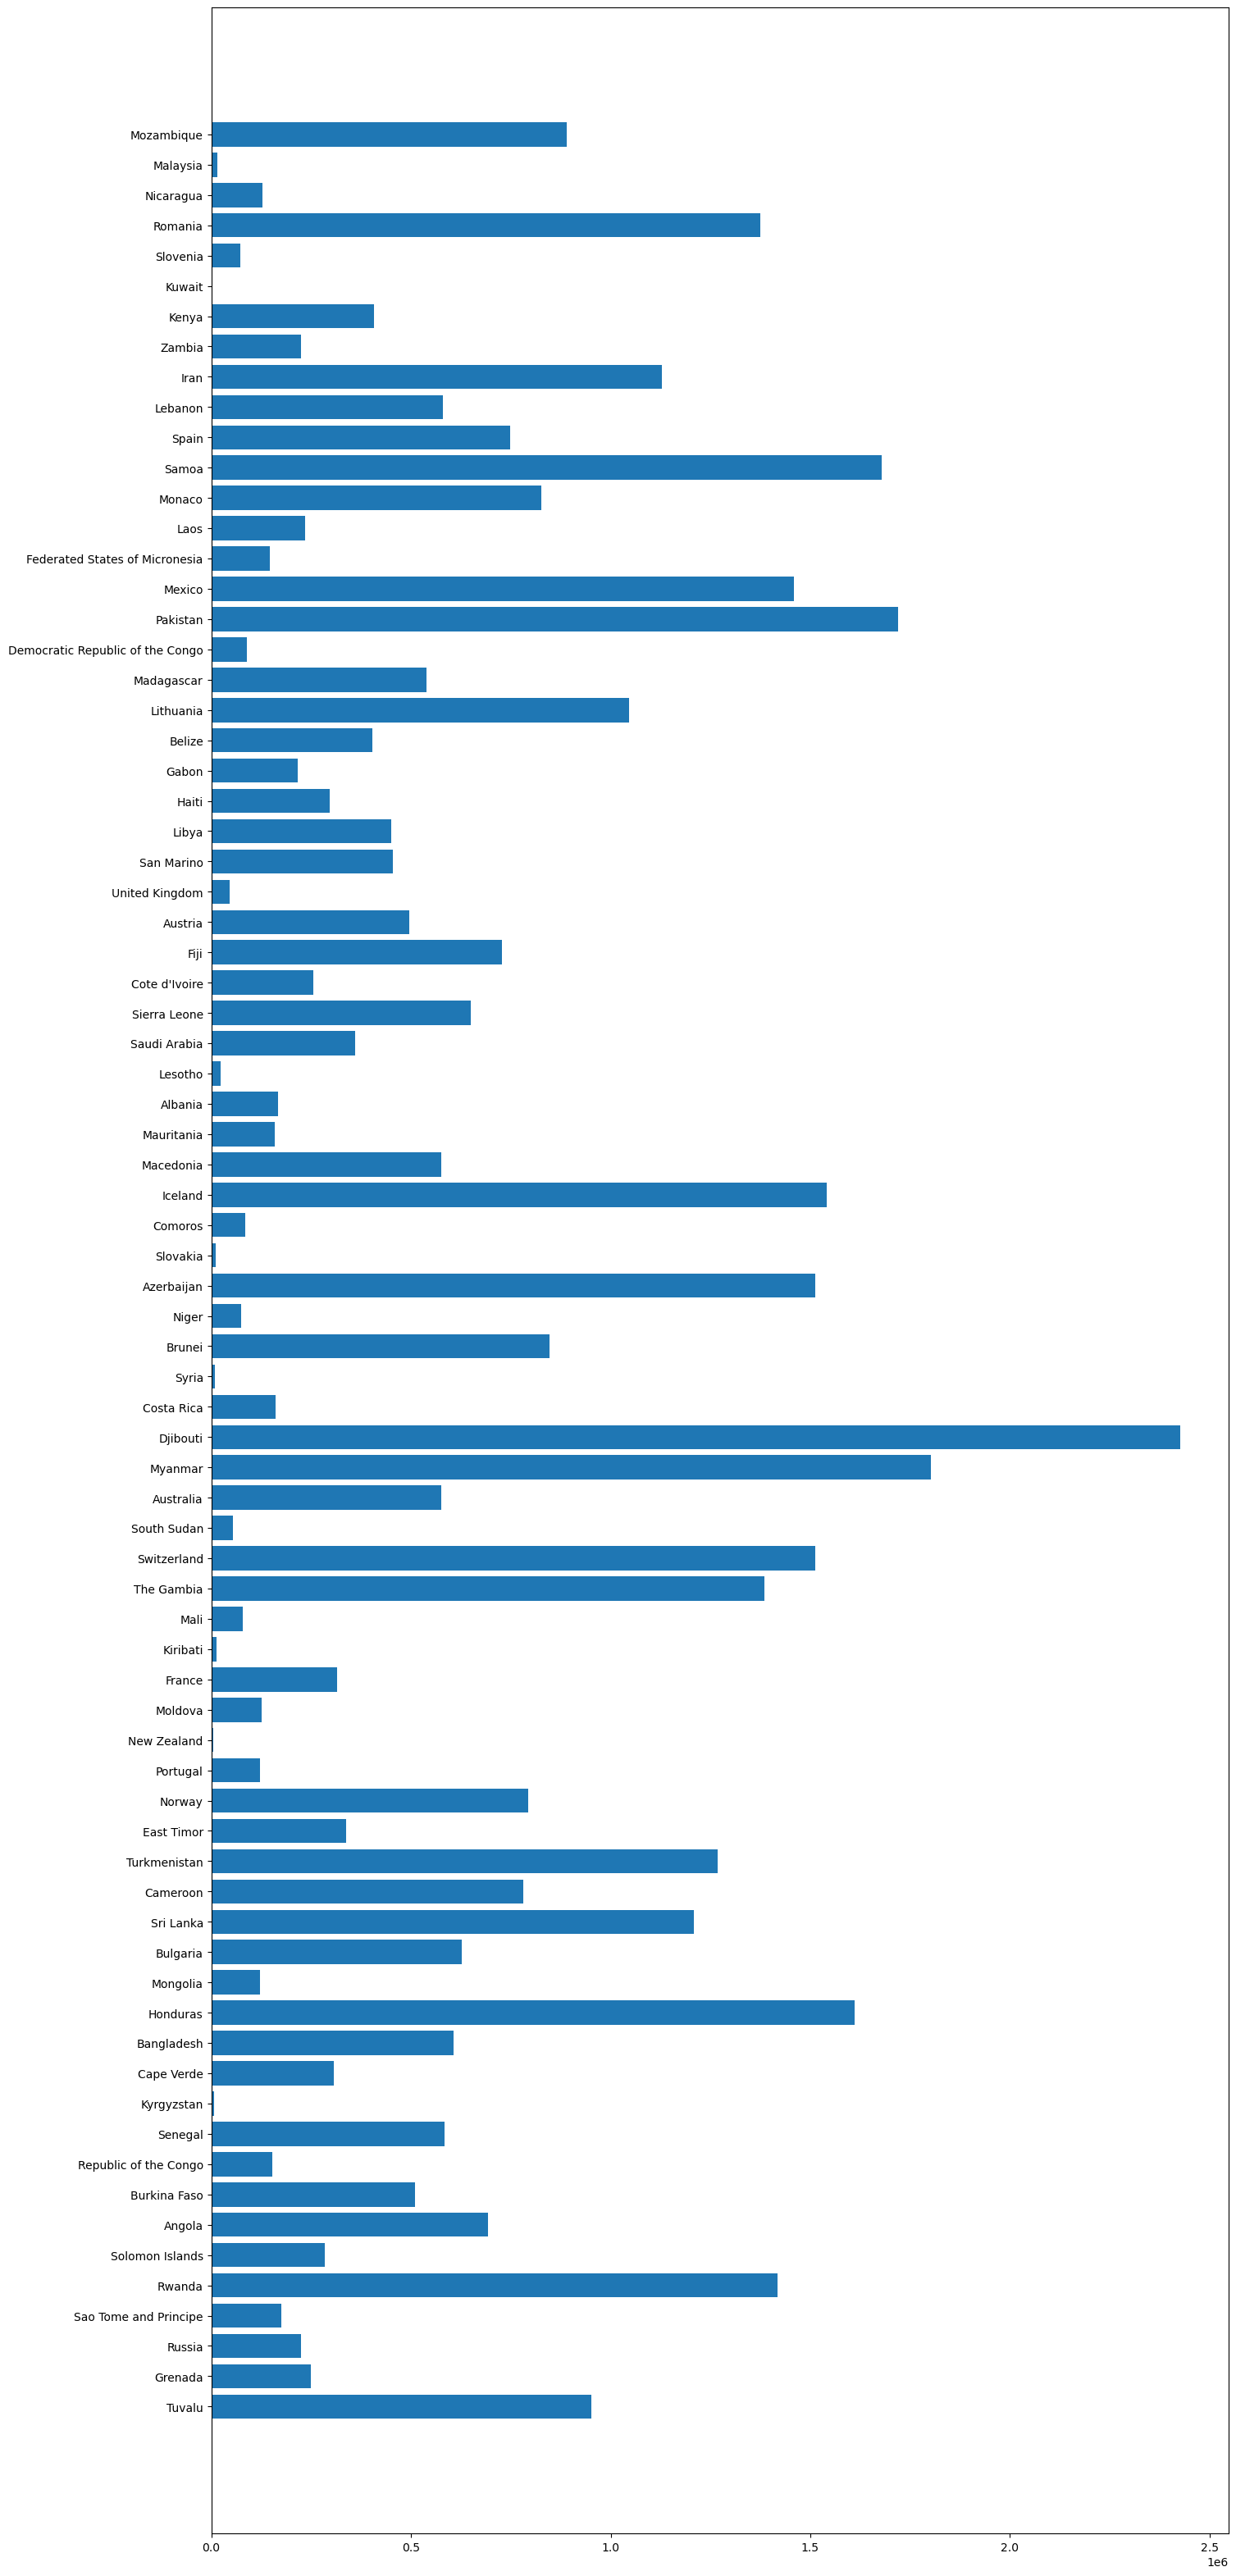

In [21]:
c = df['Country'].unique()
l2 = []
for i in df['Country'].unique():
    b = df[df['Country']==i]['Total Profit'].sum()
    l2.append(b)
plt.figure(figsize=(16,40))
plt.barh(c,l2)
plt.show()

<hr style="border:2px solid gray"> </hr>

# • Profit Distribution of Items

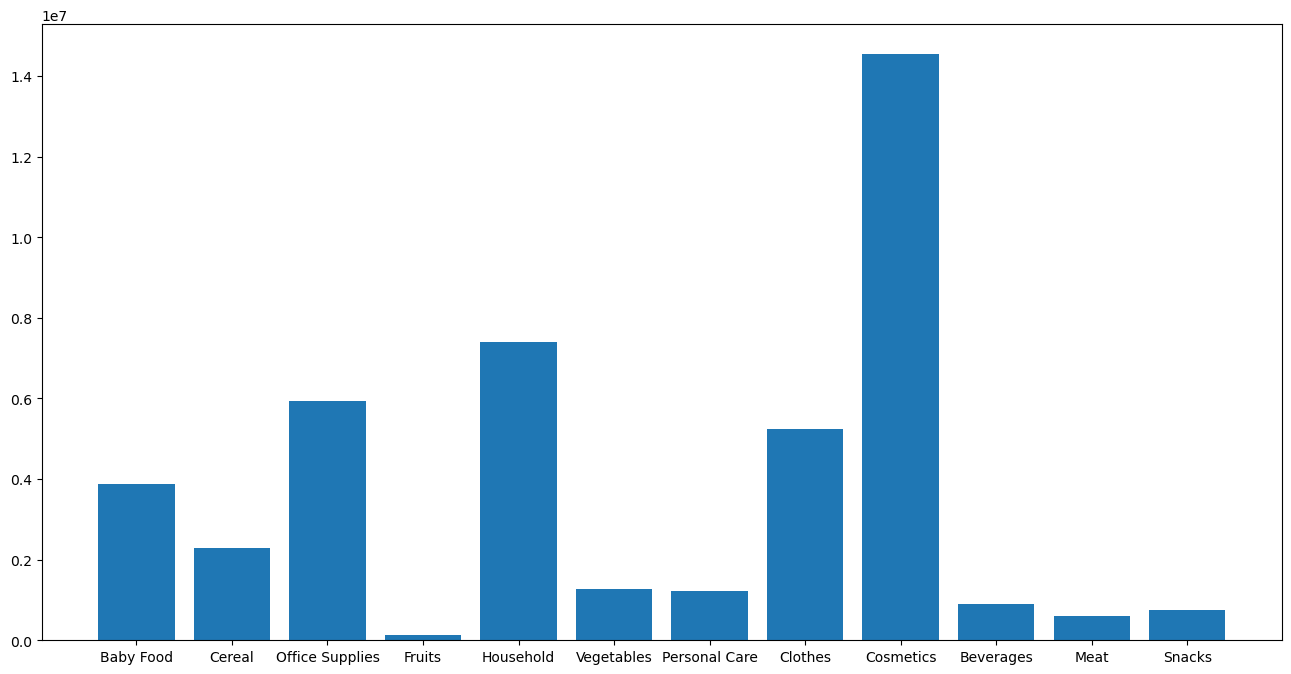

In [22]:
items = df['Item Type'].unique()
cost = []
for i in items:
    g = df[df['Item Type']==i]['Total Profit'].sum()
    cost.append(g)

plt.figure(figsize=(16,8))
plt.bar(items,cost)
plt.show()

<hr style="border:2px solid gray"> </hr>

# • Conclusion

* Most Profitable item in amazon is cosmetic
* most profit generating country in amazon is Djibouti.
* Most Proft generating Region is Sub Saharan Africa.
* 50% Of sales channel offline and 50% item sold online
* Most Demanding Order Priop=rity is H.

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>